In [1]:
import onnxruntime as rt
import numpy
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.special import softmax

In [2]:
# Images are resized into (28x28) in grayscale, with a black background 
# and a white foreground (the number should be in white).
# Color value is scaled to [0.0, 1.0].

def display_test_digit():
    digit = 0
    filename = f"./images/experiment/{digit}_28px.png"
    img = plt.imread(filename)

    # Grab just the R channel (RGB all have the same values here)
    img = img[:, :, 0]

    # Now, black is 1.0, white is 0.0
    # Invert so that black is 0.0 and white is 1.0
    img = 1 - img

    plt.imshow(img)
    plt.colorbar()
    
def compute_predictions():
    results = []
    sess = rt.InferenceSession("./mnist/model.onnx")
    input_name = sess.get_inputs()[0].name
    label_name = sess.get_outputs()[0].name
    
    for index in range(10):
        filename = f"./images/experiment/{index}_28px.png"
        img = plt.imread(filename)
        img = img[:, :, 0]
        img = 1 - img
        img = np.reshape(img, (1,1,28,28))
        
        result = sess.run([label_name], {input_name: img.astype(numpy.float32)})[0]
        results.append(result)
        
    return results

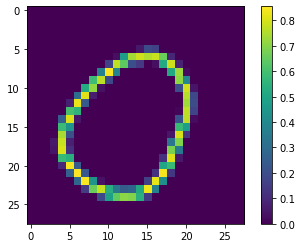

In [3]:
display_test_digit()

In [4]:
results = compute_predictions()

In [5]:
results

[array([[10.728172 , -6.8007207,  1.5580465, -1.6515799, -5.180762 ,
         -2.3467376, -2.220358 , -1.0861558,  1.7466371,  3.5954921]],
       dtype=float32),
 array([[-3.2213569 ,  5.7605634 ,  2.5082083 ,  0.99621016, -1.5549271 ,
         -4.429056  , -6.6317863 ,  3.9202158 , -3.6322498 ,  0.39035892]],
       dtype=float32),
 array([[ 1.5843709 ,  0.33803695,  9.26572   ,  0.84295595, -6.3768287 ,
         -0.52331126, -5.901234  , -1.6097771 , -4.023111  , -1.5818892 ]],
       dtype=float32),
 array([[-1.1189073, -5.464125 ,  2.3455467, 13.291215 , -6.988659 ,
          2.52335  , -6.3168106, -0.9385462,  0.0174595,  1.1397445]],
       dtype=float32),
 array([[-3.7166035 , -3.541924  , -3.0699298 , -5.042224  ,  6.9845304 ,
          1.2912376 ,  0.699243  ,  0.18104938,  3.2353134 ,  1.7414731 ]],
       dtype=float32),
 array([[-2.1720507 , -7.091644  , -0.39993024,  2.0522482 , -4.371628  ,
         14.31105   , -1.2504776 , -2.0695884 ,  2.0834448 ,  1.949433  ]],
     

In [6]:
result = softmax(results[0])

In [18]:
for probability in result[0]:
    probability_formatted = format(probability, '.5f')
    print(probability_formatted)

0.99896
0.00000
0.00010
0.00000
0.00000
0.00000
0.00000
0.00001
0.00013
0.00080
